In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR


import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.inspection import permutation_importance
from scipy.cluster import hierarchy

from collections import defaultdict
from scipy.spatial.distance import squareform
from sklearn.pipeline import Pipeline, make_pipeline, FunctionTransformer





In [2]:
# Путь к тренировочному набору
path_train = 'train_house_B.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  =  'test_house_B.csv' # содержит только имя файла, без имен папок

data = pd.read_csv(path_train)

In [3]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3360000,-0.091662,0.593876,-0.087882,-2.465344,0.077307,0.151482,1.452151,1.772175,-1.264971,...,-0.141322,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063,1.307431
404,5950000,-1.406286,0.179794,0.640850,0.405623,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,...,-0.141322,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063,-0.478408
405,3675000,-0.091662,1.099966,0.225750,-2.465344,-0.716123,-0.534316,-0.090348,1.151380,1.631097,...,-0.141322,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063,1.307431
406,7455000,1.222962,1.498909,-0.392289,0.405623,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,...,-0.141322,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063,-0.478408


In [4]:
data.duplicated().sum()

0

In [5]:
X = data.drop(columns = ['price'])
y = data.loc[:,'price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3)

cv = ShuffleSplit(n_splits = 10, test_size = 0.3)

In [6]:
print(f"X_train {X_train.shape}   y_train {y_train.shape}\nX_test {X_test.shape}    y_test {y_test.shape}\n")

X_train (285, 29)   y_train (285,)
X_test (123, 29)    y_test (123,)



In [7]:
scoring = 'neg_mean_absolute_percentage_error'

# ridge

In [9]:
model = Ridge()
model.fit(X_train, y_train)

dropped = X_train.columns.values[model.coef_ == 0]
r2_list = cross_val_score(model, X_train, y_train, cv = cv, scoring = "r2").round(5)
mape_list = -1*cross_val_score(model, X_train, y_train, cv = cv, scoring = ('neg_mean_absolute_percentage_error')).round(5)

print(f"r2 на проверочном наборе: {r2_score(y_test, model.predict(X_test)):.4f}")
print(f"r2 средний кроссвал {round(r2_list.mean(),5)}\n")

print(f"mape на проверочном наборе: {mean_absolute_percentage_error(y_test, model.predict(X_test)):.4f}")
print(f"mape средний кроссвал {round(mape_list.mean(),5)}\n")


r2 на проверочном наборе: 0.6505
r2 средний кроссвал 0.64881

mape на проверочном наборе: 0.1959
mape средний кроссвал 0.19494



# svr

In [11]:
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)


r2_list = cross_val_score(model, X_train, y_train, cv = cv, scoring = "r2").round(5)
mape_list = -1*cross_val_score(model, X_train, y_train, cv = cv, scoring = ('neg_mean_absolute_percentage_error')).round(5)

print(f"r2 на проверочном наборе: {r2_score(y_test, model.predict(X_test)):.4f}")
print(f"r2 средний кроссвал {round(r2_list.mean(),5)}\n")

print(f"mape на проверочном наборе: {mean_absolute_percentage_error(y_test, model.predict(X_test)):.4f}")
print(f"mape средний кроссвал {round(mape_list.mean(),5)}\n")

r2 на проверочном наборе: 0.0002
r2 средний кроссвал -0.04957

mape на проверочном наборе: 0.3242
mape средний кроссвал 0.327



# лес

In [12]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

r2_list = cross_val_score(model, X_train, y_train, cv = cv, scoring = "r2").round(5)
mape_list = -1*cross_val_score(model, X_train, y_train, cv = cv, scoring = ('neg_mean_absolute_percentage_error')).round(5)

print(f"r2 на проверочном наборе: {r2_score(y_test, model.predict(X_test)):.4f}")
print(f"r2 средний кроссвал {round(r2_list.mean(),5)}\n")

print(f"mape на проверочном наборе: {mean_absolute_percentage_error(y_test, model.predict(X_test)):.4f}")
print(f"mape средний кроссвал {round(mape_list.mean(),5)}\n")

r2 на проверочном наборе: 0.5267
r2 средний кроссвал 0.51272

mape на проверочном наборе: 0.2161
mape средний кроссвал 0.19597



# отберем шумящие признаки

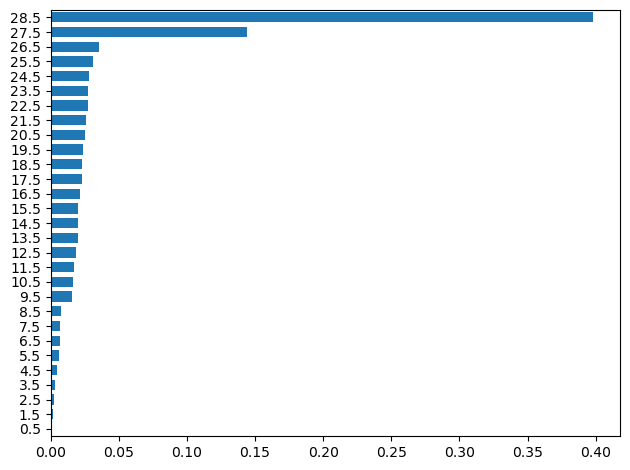

In [13]:
# график значимости признаков
result = permutation_importance(model, X_train, y_train, n_repeats=10)

perm_sorted_idx = result.importances_mean.argsort()
tree_importance_sorted_idx = np.argsort(model.feature_importances_)
tree_indices = np.arange(0, len(model.feature_importances_)) + 0.5

fig, (ax1) = plt.subplots(1)

ax1.barh(tree_indices, model.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(model.feature_importances_)))

fig.tight_layout()
plt.show()

отберем рекурсивно

array(['1', '2', '3', '4', '6', '12', '15', '16', '17', '20', '22', '24',
       '25', '27'], dtype=object)

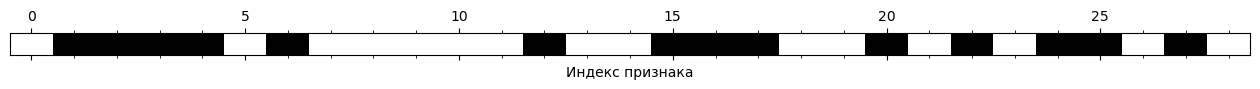

In [14]:
rfe_select = RFE(LinearRegression())

rfe_select.fit(X_train, y_train)

mask3 = rfe_select.get_support()
plt.matshow( mask3.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");
mask3.sum()
rfe_select.get_feature_names_out()

In [16]:
def feature_importance(model, limit = 0.001, sort = False, color = 'mediumseagreen'):
    
    table = pd.DataFrame(model.feature_importances_.reshape(1, -1), columns = model.feature_names_in_)
    
    limited = model.feature_names_in_[model.feature_importances_.reshape(1, -1)[0] <= limit]
    print(f"признаки с важностью менее {limit}:\n{limited}\n".replace("[", "").replace("]", "").replace("' '", "', '"))
    
    if sort == True: table = table.sort_values(by = 0, axis = 1, ascending = False)
    plt.figure(figsize = (6, 5))

    sns.barplot(table, orient = 'h', color = color, edgecolor = '.91')
    plt.xlabel("важность", fontsize = 11, labelpad = 15)
    plt.ylabel("признак", fontsize = 11, labelpad = 15);

признаки с важностью менее 0.01:
'3', '10', '15', '16', '17', '18', '19', '28'



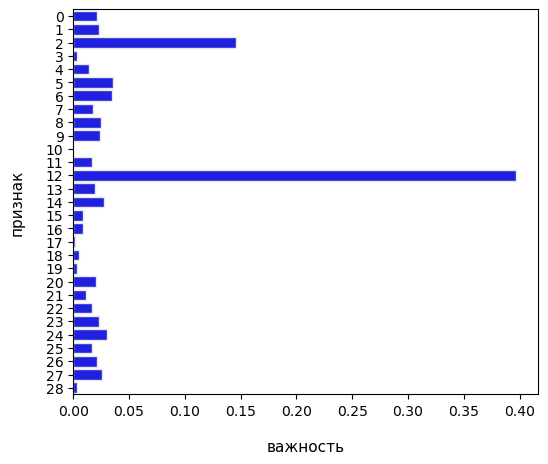

In [17]:
model.fit(X_train, y_train)
feature_importance(model, limit = 0.01, color = 'b')


In [27]:
features = ['2', '3', '4', '6', '12', '15', '20', '22', '24','27']

# подберем финальную модель

In [28]:
pipe_SVM = Pipeline([('preprocessing', FunctionTransformer(lambda x: x[features])),
                     ('estimator', SVR(kernel = 'linear', C = 1))])

pipe_SVM.fit(X_train, y_train)


r2_list = cross_val_score(model, X_train, y_train, cv = cv, scoring = "r2").round(5)
mape_list = -1*cross_val_score(model, X_train, y_train, cv = cv, scoring = ('neg_mean_absolute_percentage_error')).round(5)

print(f"r2 на проверочном наборе: {r2_score(y_test, model.predict(X_test)):.4f}")
print(f"r2 средний кроссвал {round(r2_list.mean(),5)}\n")

print(f"mape на проверочном наборе: {mean_absolute_percentage_error(y_test, model.predict(X_test)):.4f}")
print(f"mape средний кроссвал {round(mape_list.mean(),5)}\n")

r2 на проверочном наборе: 0.5313
r2 средний кроссвал 0.5388

mape на проверочном наборе: 0.2127
mape средний кроссвал 0.20686



In [29]:
pipe_RF = Pipeline([('preprocessing', FunctionTransformer(lambda x: x[features])),
                    ('estimator', RandomForestRegressor(n_estimators = 1000, criterion = 'absolute_error', max_features = 7,
                                                        n_jobs = -1))])

pipe_RF.fit(X_train, y_train)

r2_list = cross_val_score(model, X_train, y_train, cv = cv, scoring = "r2").round(5)
mape_list = -1*cross_val_score(model, X_train, y_train, cv = cv, scoring = ('neg_mean_absolute_percentage_error')).round(5)

print(f"r2 на проверочном наборе: {r2_score(y_test, model.predict(X_test)):.4f}")
print(f"r2 средний кроссвал {round(r2_list.mean(),5)}\n")

print(f"mape на проверочном наборе: {mean_absolute_percentage_error(y_test, model.predict(X_test)):.4f}")
print(f"mape средний кроссвал {round(mape_list.mean(),5)}\n")

r2 на проверочном наборе: 0.5313
r2 средний кроссвал 0.53366

mape на проверочном наборе: 0.2127
mape средний кроссвал 0.21005



In [31]:
for i in ['SVM', 'RF']:
    exec(f"y_predict_{i} = pipe_{i}.predict(X_test)")#### 1 Тестовые метрики 
for i in ['SVM', 'RF']:
    print(f"model {i} test MAPE: {mean_absolute_percentage_error(y_test, eval(f'y_predict_{i}')):.4f}")

model SVM test MAPE: 0.3243
model RF test MAPE: 0.2309
